In [2]:
# set width = 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import seaborn as sns
import os

# Data Exploration

In [4]:
data = pd.read_csv("data/data.csv")
print("Duplicate entries:", sum(data.duplicated()))
# remove duplicated data
data = data.drop_duplicates()
print("Nan Count:")
print(data.isna().sum())
data.info()

Duplicate entries: 2159
Nan Count:
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 172230 entries, 0 to 174387
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      172230 non-null  float64
 1   artists           172230 non-null  object 
 2   danceability      172230 non-null  float64
 3   duration_ms       172230 non-null  int64  
 4   energy            172230 non-null  float64
 5   explicit          172230 non-null  int64  
 6   id                172230 non-null 

## split data and ensure y coverage

Text(0.5, 0, 'popularity')

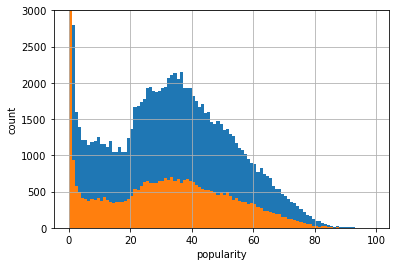

In [5]:
data_train, data_test = train_test_split(data, random_state=42)
x_train, x_test, y_train, y_test = data_train.drop('popularity', axis=1), data_test.drop('popularity', axis=1), data_train['popularity'], data_test['popularity']
y_train.hist(bins=range(100))
y_test.hist(bins=range(100))
plt.ylim(0,3000)
plt.ylabel('count')
plt.xlabel('popularity')

## look at training data

In [6]:
data_train.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7119,0.8420,['Ella Fitzgerald'],0.329,213920,0.160,0,4dRsNHZdFTtYKDh05EyfJw,0.000101,10,0.1460,-15.606,1,Ev'ry Time We Say Goodbye,46,1956-01-01,0.0324,80.359,0.232,1956
35076,0.0323,['Less Than Jake'],0.541,202106,0.943,0,6xOZCV4EPCupXwvqajSKzq,0.000000,2,0.0912,-4.270,1,History Of A Boring Town,51,1998-01-01,0.0551,107.317,0.779,1998
162445,0.9480,"[""Lightnin' Hopkins""]",0.585,129573,0.414,0,0iRxyng88iIeus3mV2yK2c,0.090000,8,0.2610,-7.504,1,Heavy Snow,9,1962-05-26,0.0542,181.641,0.335,1962
16478,0.6880,"['Baby Bash', 'Frankie J']",0.662,239027,0.748,0,6Nq5lE0CeOAAAqN4qhkbZU,0.000008,5,0.0841,-3.041,0,Suga Suga,75,2003-01-01,0.2680,82.331,0.535,2003
126104,0.0807,['Chill Out 2018'],0.518,213600,0.620,0,3X1Sb7Pq4eyqfZXG8BYZGC,0.951000,9,0.1300,-10.438,0,Same Time Next Year,0,2019-05-15,0.0303,118.017,0.461,2019


In [7]:
data_train.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,129172.000000,129172.000000,1.291720e+05,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000
mean,0.501296,0.536574,2.325686e+05,0.480994,0.068010,0.195398,5.214156,0.211697,-11.782635,0.702048,25.946707,0.105971,116.984252,0.525401,1976.582990
std,0.379436,0.175925,1.459441e+05,0.272048,0.251764,0.333338,3.520302,0.180921,5.686235,0.457360,21.872039,0.183304,30.248035,0.264452,26.714325
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.090700,0.414000,1.662000e+05,0.248000,0.000000,0.000000,2.000000,0.099300,-14.943250,0.000000,1.000000,0.035200,93.964750,0.311000,1955.000000
50%,0.522000,0.548000,2.057635e+05,0.463000,0.000000,0.000496,5.000000,0.138000,-10.865000,1.000000,26.000000,0.045400,115.750000,0.537000,1977.000000
75%,0.896000,0.668000,2.656670e+05,0.708000,0.000000,0.241000,8.000000,0.271000,-7.541000,1.000000,42.000000,0.076000,134.992250,0.745000,1998.000000
max,0.996000,0.987000,4.792587e+06,1.000000,1.000000,1.000000,11.000000,0.999000,3.744000,1.000000,100.000000,0.970000,243.507000,1.000000,2021.000000


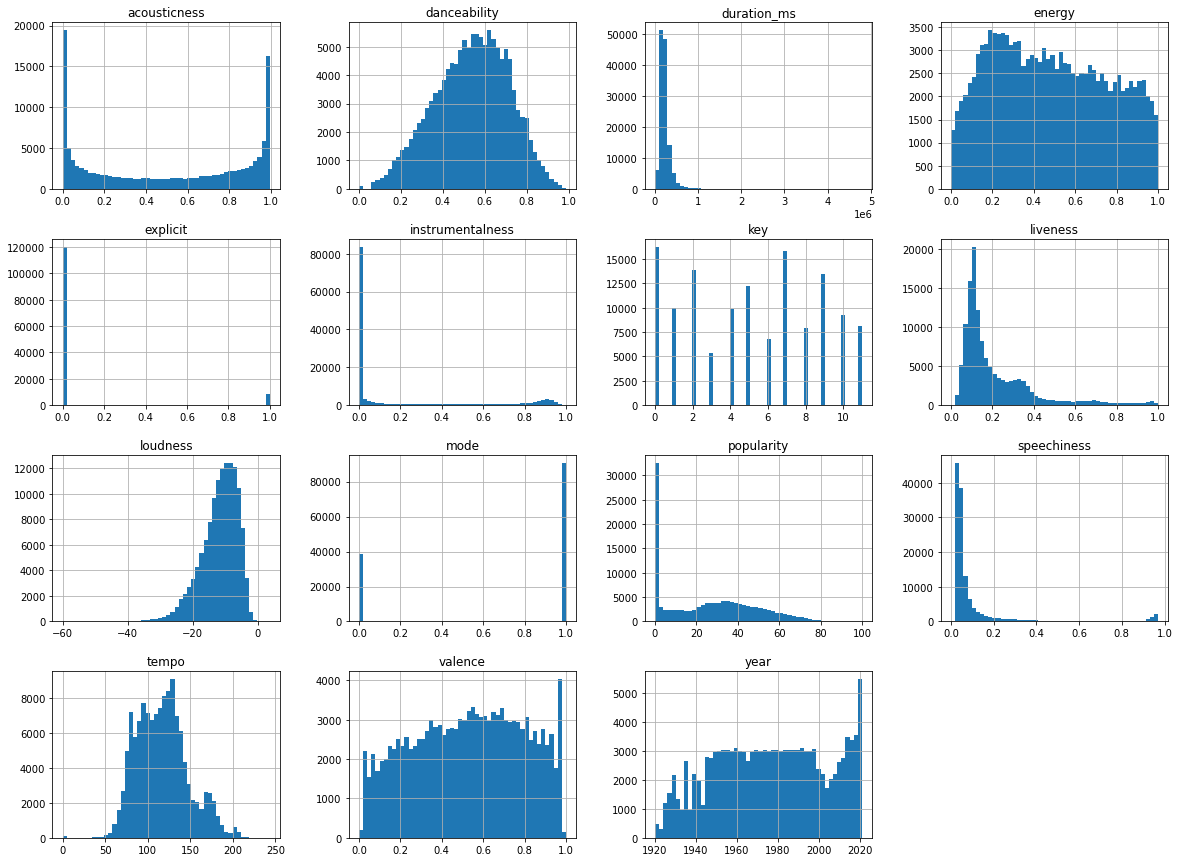

In [8]:
data_train.hist(bins=50, figsize=(20,15))
plt.show()

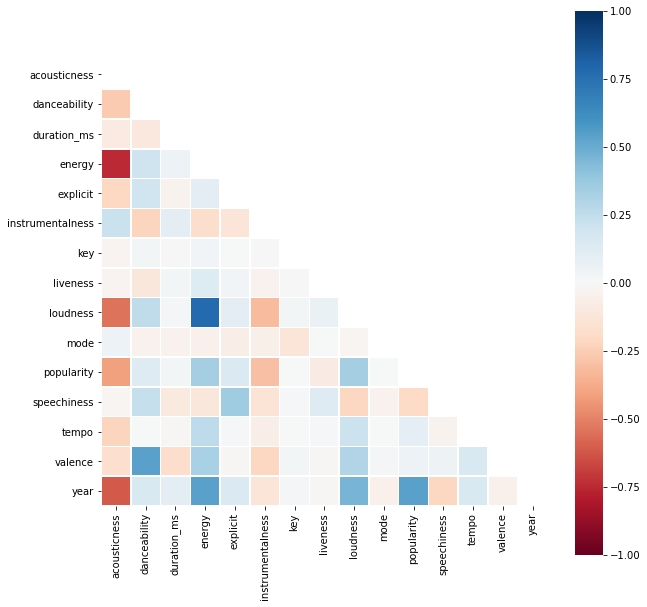

In [9]:
corr_matrix = data_train.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='RdBu', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, mask=mask)
plt.show()

Looks like acousticness and year are linearly correlated with popularity

Now looking for non linear correlations

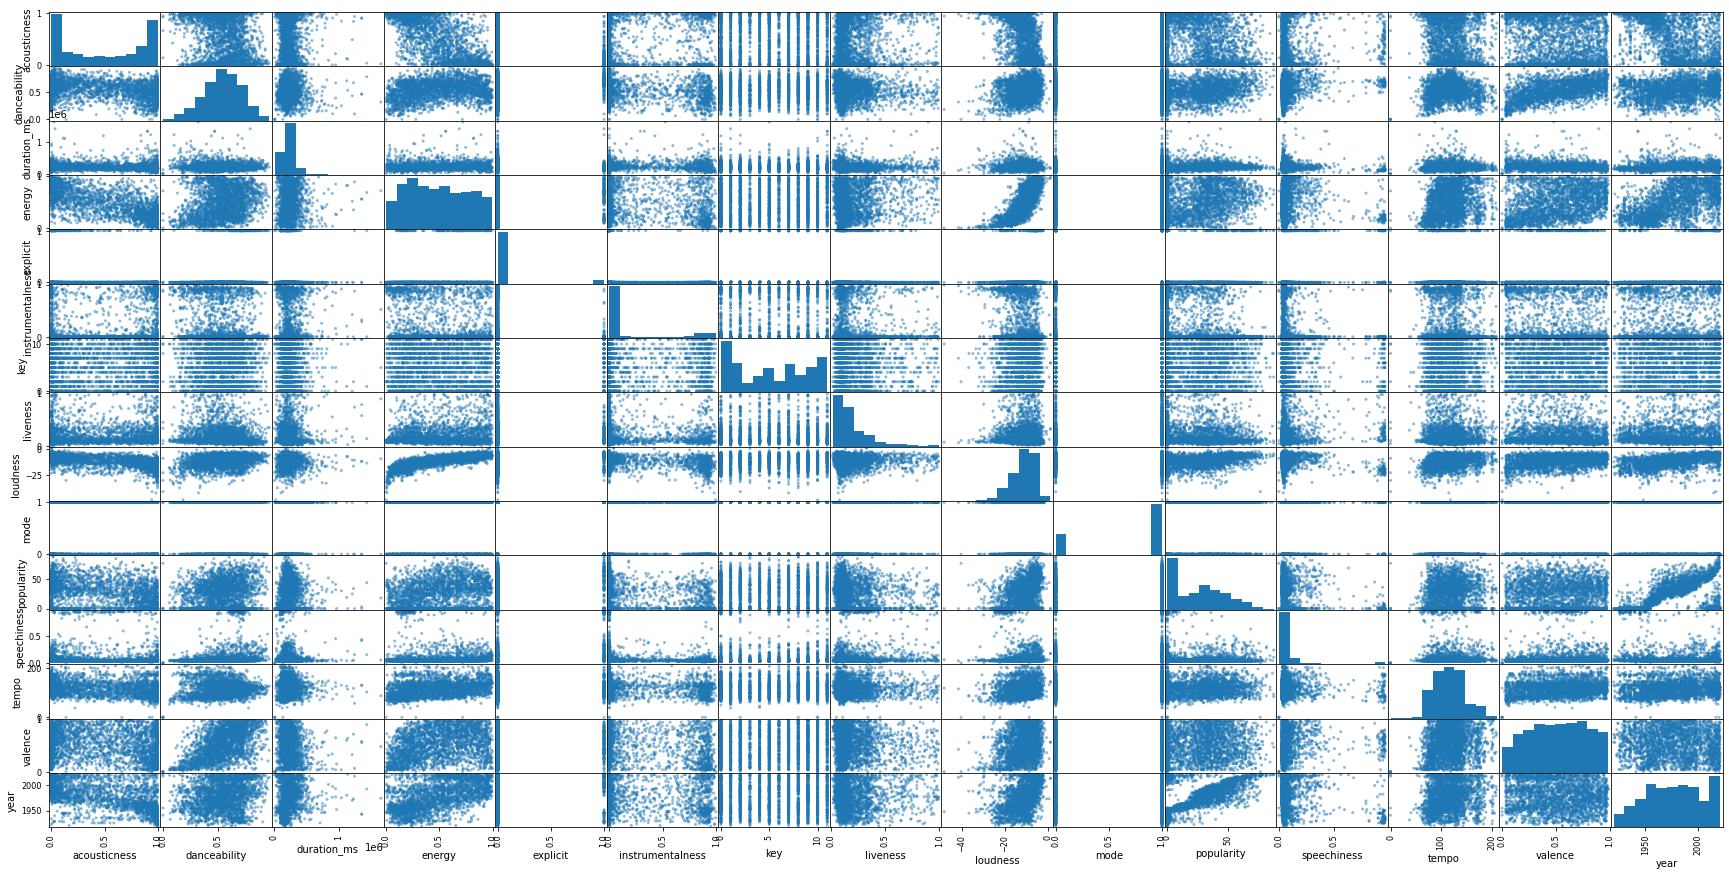

In [10]:
# a lot of data, so take ever 50 to improve plotting
scatter_matrix(data_train[::50], figsize=(30,15))
plt.show()

Not much to be gained beyond the correlation matrix

# Building Pipeline and training models

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from copy import deepcopy

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
class ColumnDroper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        if self.columns_to_drop != None:
            return x.drop(labels=self.columns_to_drop, axis=1)
        else:
            return x

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
def visualize_model_preformance(model, x_valid, y_valid, s=1, name="model_name", alpha=0.1):
    y_predicted = model.predict(x_valid)
    plt.scatter(y_valid,y_predicted,alpha=alpha, s=s, label='model')
    plt.scatter(y_valid,y_valid,alpha=alpha, s=s, label='target')
    plt.legend()
    plt.ylabel('predicted')
    plt.xlabel('expected')
    plt.title(name)
    plt.savefig(name+".png")
    plt.show()
    
def train_and_vis_model(model, x_train, y_train, x_train_v, y_train_v, x_valid, y_valid, s=2, cv=3, scoring="neg_mean_squared_error", name='model_name'):
    scores = cross_val_score(model, x_train, y_train, scoring=scoring, cv=cv)
    rmse = np.sqrt(-scores)
    display_scores(rmse)
    model = model.fit(x_train_v, y_train_v)
    visualize_model_preformance(model, x_valid, y_valid, s=s, name=name)


def plot_history(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
#     plt.gca().set_ylim(0,1)
    plt.show()

Text(0.5, 0, 'popularity')

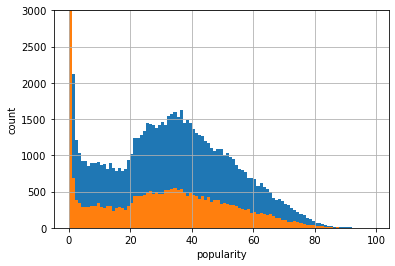

In [13]:
x_train, x_test, y_train, y_test = data_train.drop('popularity', axis=1), data_test.drop('popularity', axis=1), data_train['popularity'], data_test['popularity']
data_train_v, data_valid = train_test_split(data_train, random_state=42)
x_train_v, x_valid, y_train_v, y_valid = data_train_v.drop('popularity', axis=1), data_valid.drop('popularity', axis=1), data_train_v['popularity'], data_valid['popularity']
y_train_v.hist(bins=range(100))
y_valid.hist(bins=range(100))
plt.ylim(0,3000)
plt.ylabel('count')
plt.xlabel('popularity')

In [14]:
baseline = mean_squared_error(y_train, np.ones(y_train.shape)*y_train.mean())
baseline = np.sqrt(baseline)
print("Baseline Train: ", baseline)
baseline = mean_squared_error(y_valid, np.ones(y_valid.shape)*y_train.mean())
baseline = np.sqrt(baseline)
print("Baseline Validation: ", baseline)
baseline = mean_squared_error(y_test, np.ones(y_test.shape)*y_train.mean())
baseline = np.sqrt(baseline)
print("Baseline Test: ", baseline)

Baseline Train:  21.871953894117897
Baseline Validation:  21.81376756490111
Baseline Test:  21.850896002858516


linear regression

Scores: [17.11772943 17.21971926 17.17786019]
Mean: 17.171769626803712
Standard Deviation: 0.0418593087184971


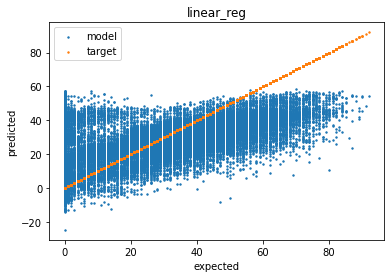

In [145]:
model = Pipeline([('attribs_adder', ColumnDroper(['artists', 'id', 'name', 'release_date'])), # drops text inputs
                       ('std_scaler', StandardScaler()), # scales data so it is consistant across parameters
                        ('reg', LinearRegression())
                       ])
train_and_vis_model(model, x_train, y_train, x_train_v, y_train_v, x_valid, y_valid, name='linear_reg')

random forest regression

Scores: [12.64133415 12.56643406 12.5658911 ]
Mean: 12.591219769571682
Standard Deviation: 0.03543690943113567


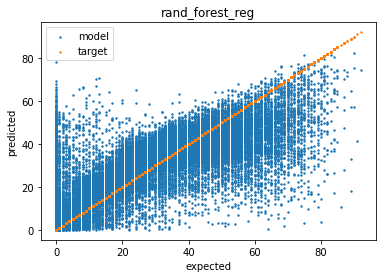

In [146]:
model = Pipeline([('attribs_adder', ColumnDroper(['artists', 'id', 'name', 'release_date'])), # drops text inputs
                       ('std_scaler', StandardScaler()), # scales data so it is consistant across parameters
                        ('reg', RandomForestRegressor())
                       ])
train_and_vis_model(model, x_train, y_train, x_train_v, y_train_v, x_valid, y_valid, name='rand_forest_reg')

Linear SVR

Scores: [18.40440173 18.6122362  18.55633373]
Mean: 18.52432388589412
Standard Deviation: 0.0878152039772878


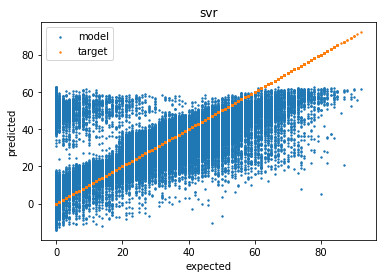

In [147]:
model = Pipeline([('attribs_adder', ColumnDroper(['artists', 'id', 'name', 'release_date'])), # drops text inputs
                       ('std_scaler', StandardScaler()), # scales data so it is consistant across parameters
                        ('reg', LinearSVR())
                       ])
train_and_vis_model(model, x_train, y_train, x_train_v, y_train_v, x_valid, y_valid, name='svr')

DNN

In [191]:
data_pipeline = Pipeline([('attribs_adder', ColumnDroper(['artists', 'id', 'name', 'release_date'])), # drops text inputs
                       ('std_scaler', StandardScaler()), # scales data so it is consistant across parameters
                       ])
# scale data for ANN
data_pipeline.fit(x_train_v)
x_train_v_scaled = data_pipeline.transform(x_train_v)
x_valid_scaled = data_pipeline.transform(x_valid)

# make ANN
model = keras.models.Sequential([
    Dense(30, activation='relu', input_shape=x_train_v_scaled.shape[1:]), 
    Dense(30, activation='relu'), 
    Dense(1)
])
optimizer = keras.optimizers.SGD(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=optimizer)
history = model.fit(x_train_v_scaled, 
                    y_train_v, 
                    epochs=1000, 
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = [EarlyStopping(patience=50,restore_best_weights=True)])

Epoch 1/1000
3028/3028 [==============================] - 2s 731us/step - loss: 268.5053 - val_loss: 214.0056
Epoch 2/1000
3028/3028 [==============================] - 2s 799us/step - loss: 201.9977 - val_loss: 230.7723
Epoch 3/1000
3028/3028 [==============================] - 2s 748us/step - loss: 194.2946 - val_loss: 191.0064
Epoch 4/1000
3028/3028 [==============================] - 3s 963us/step - loss: 186.9409 - val_loss: 192.6567
Epoch 5/1000
3028/3028 [==============================] - 2s 747us/step - loss: 184.9141 - val_loss: 186.6240
Epoch 6/1000
3028/3028 [==============================] - 2s 702us/step - loss: 185.4256 - val_loss: 217.4153
Epoch 7/1000
3028/3028 [==============================] - 2s 700us/step - loss: 183.2480 - val_loss: 183.9954
Epoch 8/1000
3028/3028 [==============================] - 2s 698us/step - loss: 182.6634 - val_loss: 195.3992
Epoch 9/1000
3028/3028 [==============================] - 2s 712us/step - loss: 184.2679 - val_loss: 187.1319
Epoch 10/1

Epoch 75/1000
3028/3028 [==============================] - 2s 694us/step - loss: 166.9324 - val_loss: 175.3643
Epoch 76/1000
3028/3028 [==============================] - 2s 707us/step - loss: 165.9340 - val_loss: 178.1247
Epoch 77/1000
3028/3028 [==============================] - 2s 712us/step - loss: 161.6975 - val_loss: 185.0328
Epoch 78/1000
3028/3028 [==============================] - 2s 686us/step - loss: 168.4247 - val_loss: 180.1459
Epoch 79/1000
3028/3028 [==============================] - 2s 693us/step - loss: 167.0083 - val_loss: 182.7520
Epoch 80/1000
3028/3028 [==============================] - 2s 691us/step - loss: 166.9092 - val_loss: 194.2298
Epoch 81/1000
3028/3028 [==============================] - 2s 700us/step - loss: 165.2272 - val_loss: 177.5706
Epoch 82/1000
3028/3028 [==============================] - 2s 705us/step - loss: 167.7325 - val_loss: 183.3525
Epoch 83/1000
3028/3028 [==============================] - 2s 683us/step - loss: 165.6968 - val_loss: 177.7311
E

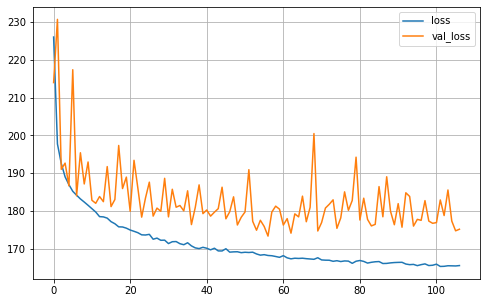

In [192]:
plot_history(history)

1010/1010 [==============================] - 1s 514us/step - loss: 184.0632
13.566989419333122


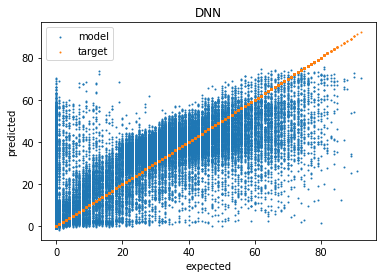

In [195]:
loss = model.evaluate(x_valid_scaled, y_valid)
print(np.sqrt(loss))
visualize_model_preformance(model, x_valid_scaled, y_valid, s=1, name="DNN")

## Tuning hyperparameters

In [206]:
def spotify_pop_model(n_hidden=2, learning_rate=1e-3, n_nodes=100, input_shape=[14], activation='selu'):
    model = keras.models.Sequential()
    model.add(Dense(n_nodes, activation=activation, kernel_initializer='lecun_normal', input_shape=input_shape))
    for n in range(n_hidden-1):
        model.add(Dense(n_nodes, activation=activation, kernel_initializer='lecun_normal'))
    model.add(Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# store logs for tf
root_logdir = os.path.join(os.curdir, 'spotify_pop_logs')
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

def get_model_save_name():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S.h5')
    return os.path.join('models/', run_id)

In [213]:
param_distribs = {
    'n_hidden': [5,4,3],
    'n_nodes': [15,20,25],
    'learning_rate': 10**np.arange(-5.,-2)[::-1]
}
best_params = {'n_hidden': None,
    'n_nodes': None,
    'learning_rate': None,
    'loss': float('inf'),
    'logs': None,
    'model': None}
count = 0
for hidden in param_distribs['n_hidden']:
    for nodes in param_distribs['n_nodes']:
        for lr in param_distribs['learning_rate']:
            print('\n\n\n\n Model: {}/36, hidden: {}, nodes: {}, lr: {},'.format(count, hidden, nodes, lr))
            count +=1
            run_logdir = get_run_logdir()
            run_model_save_file = get_model_save_name()
            callbacks = [EarlyStopping(patience=50,restore_best_weights=True),
                        TensorBoard(run_logdir),
                        ModelCheckpoint(run_model_save_file, save_best_only=True)]
            model = spotify_pop_model(n_hidden=hidden, 
                                learning_rate=lr, 
                                n_nodes=nodes)
            model.fit(x_train_v_scaled, 
                      y_train_v, 
                      epochs=1000, 
                      validation_data=(x_valid_scaled, y_valid),
                      callbacks=callbacks)
            loss = model.evaluate(x_valid_scaled, y_valid)
            if loss < best_params['loss']:
                best_params = {'n_hidden': hidden,
                                'n_nodes': nodes,
                                'learning_rate': lr,
                                'loss': loss,
                                'logs': run_logdir,
                                'model': run_model_save_file}
            





 Model: 0/36, hidden: 5, nodes: 15, lr: 0.001,
Epoch 1/1000
3028/3028 [==============================] - 3s 819us/step - loss: 247.0785 - val_loss: 194.5202
Epoch 2/1000
3028/3028 [==============================] - 2s 723us/step - loss: 194.1039 - val_loss: 205.0695
Epoch 3/1000
3028/3028 [==============================] - 2s 821us/step - loss: 187.4657 - val_loss: 194.6877
Epoch 4/1000
3028/3028 [==============================] - 2s 821us/step - loss: 189.0851 - val_loss: 201.1288
Epoch 5/1000
3028/3028 [==============================] - 2s 734us/step - loss: 186.4330 - val_loss: 186.3714
Epoch 6/1000
3028/3028 [==============================] - 2s 711us/step - loss: 187.7521 - val_loss: 197.6459
Epoch 7/1000
3028/3028 [==============================] - 2s 716us/step - loss: 185.6384 - val_loss: 190.9823
Epoch 8/1000
3028/3028 [==============================] - 2s 716us/step - loss: 183.9522 - val_loss: 183.3021
Epoch 9/1000
3028/3028 [==============================] - 2s 708us/st

Epoch 20/1000
3028/3028 [==============================] - 3s 886us/step - loss: 174.2865 - val_loss: 178.4234
Epoch 21/1000
3028/3028 [==============================] - 3s 833us/step - loss: 172.5634 - val_loss: 179.4382
Epoch 22/1000
3028/3028 [==============================] - 2s 787us/step - loss: 170.1740 - val_loss: 178.6716
Epoch 23/1000
3028/3028 [==============================] - 2s 726us/step - loss: 172.4800 - val_loss: 177.8633
Epoch 24/1000
3028/3028 [==============================] - 2s 815us/step - loss: 172.4737 - val_loss: 175.5005
Epoch 25/1000
3028/3028 [==============================] - 2s 797us/step - loss: 172.1256 - val_loss: 179.1642
Epoch 26/1000
3028/3028 [==============================] - 2s 740us/step - loss: 170.6209 - val_loss: 178.8778
Epoch 27/1000
3028/3028 [==============================] - 2s 689us/step - loss: 170.1295 - val_loss: 178.5206
Epoch 28/1000
3028/3028 [==============================] - 2s 675us/step - loss: 172.5824 - val_loss: 179.3043
E

Epoch 94/1000
3028/3028 [==============================] - 2s 682us/step - loss: 163.8147 - val_loss: 173.2069
Epoch 95/1000
3028/3028 [==============================] - 2s 671us/step - loss: 163.6517 - val_loss: 173.6367
Epoch 96/1000
3028/3028 [==============================] - 2s 704us/step - loss: 166.0221 - val_loss: 178.5185
Epoch 97/1000
3028/3028 [==============================] - 2s 687us/step - loss: 163.6416 - val_loss: 173.3438
Epoch 98/1000
3028/3028 [==============================] - 2s 679us/step - loss: 164.9941 - val_loss: 173.4480
Epoch 99/1000
3028/3028 [==============================] - 2s 680us/step - loss: 165.8993 - val_loss: 174.7813
Epoch 100/1000
3028/3028 [==============================] - 2s 671us/step - loss: 163.6486 - val_loss: 172.8513
Epoch 101/1000
3028/3028 [==============================] - 2s 691us/step - loss: 164.6453 - val_loss: 175.2543
Epoch 102/1000
3028/3028 [==============================] - 2s 678us/step - loss: 165.6844 - val_loss: 172.265

3028/3028 [==============================] - 2s 710us/step - loss: 187.4391 - val_loss: 188.6820
Epoch 15/1000
3028/3028 [==============================] - 2s 702us/step - loss: 184.1033 - val_loss: 187.0764
Epoch 16/1000
3028/3028 [==============================] - 2s 732us/step - loss: 182.5747 - val_loss: 186.1643
Epoch 17/1000
3028/3028 [==============================] - 2s 695us/step - loss: 181.4532 - val_loss: 187.4375
Epoch 18/1000
3028/3028 [==============================] - 2s 678us/step - loss: 180.9422 - val_loss: 185.0575
Epoch 19/1000
3028/3028 [==============================] - 2s 687us/step - loss: 181.0225 - val_loss: 184.5255
Epoch 20/1000
3028/3028 [==============================] - 2s 700us/step - loss: 181.4074 - val_loss: 184.6348
Epoch 21/1000
3028/3028 [==============================] - 2s 698us/step - loss: 181.0096 - val_loss: 184.2786
Epoch 22/1000
3028/3028 [==============================] - 2s 721us/step - loss: 181.4382 - val_loss: 184.5783
Epoch 23/1000
3

Epoch 88/1000
3028/3028 [==============================] - 2s 668us/step - loss: 169.9832 - val_loss: 176.5521
Epoch 89/1000
3028/3028 [==============================] - 2s 668us/step - loss: 168.5560 - val_loss: 176.1701
Epoch 90/1000
3028/3028 [==============================] - 2s 700us/step - loss: 172.8883 - val_loss: 177.1780
Epoch 91/1000
3028/3028 [==============================] - 2s 669us/step - loss: 172.3119 - val_loss: 176.8362
Epoch 92/1000
3028/3028 [==============================] - 2s 677us/step - loss: 168.6424 - val_loss: 176.2740
Epoch 93/1000
3028/3028 [==============================] - 2s 680us/step - loss: 170.1187 - val_loss: 176.8654
Epoch 94/1000
3028/3028 [==============================] - 2s 670us/step - loss: 171.0504 - val_loss: 178.4113
Epoch 95/1000
3028/3028 [==============================] - 2s 681us/step - loss: 171.0940 - val_loss: 175.0396
Epoch 96/1000
3028/3028 [==============================] - 2s 671us/step - loss: 169.9326 - val_loss: 175.2906
E

3028/3028 [==============================] - 2s 687us/step - loss: 165.1404 - val_loss: 172.9173
Epoch 235/1000
3028/3028 [==============================] - 2s 682us/step - loss: 162.7424 - val_loss: 172.1968
Epoch 236/1000
3028/3028 [==============================] - 2s 681us/step - loss: 164.5116 - val_loss: 171.9171
Epoch 237/1000
3028/3028 [==============================] - 2s 671us/step - loss: 163.8459 - val_loss: 174.3448
Epoch 238/1000
3028/3028 [==============================] - 2s 681us/step - loss: 164.6493 - val_loss: 172.5391
Epoch 239/1000
3028/3028 [==============================] - 2s 670us/step - loss: 165.6387 - val_loss: 172.7385
Epoch 240/1000
3028/3028 [==============================] - 2s 673us/step - loss: 160.7988 - val_loss: 172.7159
Epoch 241/1000
3028/3028 [==============================] - 2s 677us/step - loss: 164.7838 - val_loss: 176.1068
Epoch 242/1000
3028/3028 [==============================] - 2s 666us/step - loss: 165.7934 - val_loss: 172.6938
Epoch 2

3028/3028 [==============================] - 2s 674us/step - loss: 164.3137 - val_loss: 170.5121
Epoch 381/1000
3028/3028 [==============================] - 2s 690us/step - loss: 161.4680 - val_loss: 171.0931
Epoch 382/1000
3028/3028 [==============================] - 2s 678us/step - loss: 160.4975 - val_loss: 170.7074
Epoch 383/1000
1010/1010 [==============================] - 0s 475us/step - loss: 170.0794




 Model: 3/36, hidden: 5, nodes: 20, lr: 0.001,
Epoch 1/1000
3028/3028 [==============================] - 3s 792us/step - loss: 245.3652 - val_loss: 208.2170
Epoch 2/1000
3028/3028 [==============================] - 2s 700us/step - loss: 193.8588 - val_loss: 210.8834
Epoch 3/1000
3028/3028 [==============================] - 2s 686us/step - loss: 192.0503 - val_loss: 197.2349
Epoch 4/1000
3028/3028 [==============================] - 2s 691us/step - loss: nan - val_loss: nan
Epoch 5/1000
3028/3028 [==============================] - 2s 691us/step - loss: nan - val_loss: nan
Epoch 6

Epoch 94/1000
3028/3028 [==============================] - 2s 693us/step - loss: 158.8066 - val_loss: 171.6964
Epoch 95/1000
3028/3028 [==============================] - 2s 739us/step - loss: 158.9268 - val_loss: 170.6825
Epoch 96/1000
3028/3028 [==============================] - 2s 685us/step - loss: 155.5229 - val_loss: 171.8087
Epoch 97/1000
3028/3028 [==============================] - 2s 710us/step - loss: 157.6053 - val_loss: 172.0037
Epoch 98/1000
3028/3028 [==============================] - 2s 788us/step - loss: 156.2204 - val_loss: 171.9775
Epoch 99/1000
3028/3028 [==============================] - 3s 843us/step - loss: 155.1939 - val_loss: 171.7291
Epoch 100/1000
3028/3028 [==============================] - 3s 835us/step - loss: 159.2054 - val_loss: 171.3596
Epoch 101/1000
3028/3028 [==============================] - 2s 712us/step - loss: 157.9549 - val_loss: 170.0504
Epoch 102/1000
3028/3028 [==============================] - 2s 679us/step - loss: 157.9590 - val_loss: 174.893

3028/3028 [==============================] - 2s 780us/step - loss: 167.5598 - val_loss: 174.8075
Epoch 122/1000
3028/3028 [==============================] - 2s 814us/step - loss: 163.8827 - val_loss: 175.2816
Epoch 123/1000
3028/3028 [==============================] - 2s 795us/step - loss: 161.5084 - val_loss: 172.9906
Epoch 124/1000
3028/3028 [==============================] - 2s 702us/step - loss: 164.2730 - val_loss: 173.9380
Epoch 125/1000
3028/3028 [==============================] - 2s 690us/step - loss: 165.0823 - val_loss: 175.1330
Epoch 126/1000
3028/3028 [==============================] - 2s 713us/step - loss: 166.9677 - val_loss: 175.7865
Epoch 127/1000
3028/3028 [==============================] - 2s 687us/step - loss: 163.9068 - val_loss: 172.8954
Epoch 128/1000
3028/3028 [==============================] - 2s 683us/step - loss: 165.0579 - val_loss: 173.2439
Epoch 129/1000
3028/3028 [==============================] - 2s 702us/step - loss: 163.5487 - val_loss: 174.4029
Epoch 1

3028/3028 [==============================] - 2s 687us/step - loss: 158.9569 - val_loss: 170.0482
Epoch 268/1000
3028/3028 [==============================] - 2s 689us/step - loss: 159.8786 - val_loss: 173.6712
Epoch 269/1000
3028/3028 [==============================] - 2s 696us/step - loss: 158.1328 - val_loss: 169.8670
Epoch 270/1000
3028/3028 [==============================] - 2s 701us/step - loss: 159.5681 - val_loss: 170.5194
Epoch 271/1000
3028/3028 [==============================] - 2s 713us/step - loss: 160.2224 - val_loss: 170.5298
Epoch 272/1000
3028/3028 [==============================] - 2s 703us/step - loss: 160.2726 - val_loss: 170.0101
Epoch 273/1000
3028/3028 [==============================] - 2s 718us/step - loss: 159.8063 - val_loss: 170.5541
Epoch 274/1000
3028/3028 [==============================] - 2s 764us/step - loss: 159.9320 - val_loss: 168.6902
Epoch 275/1000
3028/3028 [==============================] - 2s 732us/step - loss: 159.7962 - val_loss: 170.1537
Epoch 2

3028/3028 [==============================] - 2s 706us/step - loss: nan - val_loss: nan
Epoch 32/1000
3028/3028 [==============================] - 2s 683us/step - loss: nan - val_loss: nan
Epoch 33/1000
3028/3028 [==============================] - 2s 685us/step - loss: nan - val_loss: nan
Epoch 34/1000
3028/3028 [==============================] - 2s 694us/step - loss: nan - val_loss: nan
Epoch 35/1000
3028/3028 [==============================] - 2s 684us/step - loss: nan - val_loss: nan
Epoch 36/1000
3028/3028 [==============================] - 2s 693us/step - loss: nan - val_loss: nan
Epoch 37/1000
3028/3028 [==============================] - 2s 681us/step - loss: nan - val_loss: nan
Epoch 38/1000
3028/3028 [==============================] - 2s 712us/step - loss: nan - val_loss: nan
Epoch 39/1000
3028/3028 [==============================] - 2s 715us/step - loss: nan - val_loss: nan
Epoch 40/1000
3028/3028 [==============================] - 2s 720us/step - loss: nan - val_loss: nan
Epoc

3028/3028 [==============================] - 2s 689us/step - loss: 148.8915 - val_loss: 172.5855
Epoch 124/1000
3028/3028 [==============================] - 2s 684us/step - loss: 151.2056 - val_loss: 170.7610
Epoch 125/1000
3028/3028 [==============================] - 2s 682us/step - loss: 151.3218 - val_loss: 173.3508
Epoch 126/1000
3028/3028 [==============================] - 2s 705us/step - loss: 150.1677 - val_loss: 171.8846
Epoch 127/1000
3028/3028 [==============================] - 2s 797us/step - loss: 151.4262 - val_loss: 174.5859
Epoch 128/1000
3028/3028 [==============================] - 2s 747us/step - loss: 148.8282 - val_loss: 175.5083
Epoch 129/1000
3028/3028 [==============================] - 2s 679us/step - loss: 152.5785 - val_loss: 173.2158
Epoch 130/1000
3028/3028 [==============================] - 2s 682us/step - loss: 151.8185 - val_loss: 172.8579
Epoch 131/1000
3028/3028 [==============================] - 2s 679us/step - loss: 148.8098 - val_loss: 173.6401
Epoch 1

3028/3028 [==============================] - 2s 728us/step - loss: 164.1518 - val_loss: 174.7110
Epoch 129/1000
3028/3028 [==============================] - 2s 698us/step - loss: 163.4459 - val_loss: 173.1734
Epoch 130/1000
3028/3028 [==============================] - 2s 690us/step - loss: 165.5918 - val_loss: 174.1672
Epoch 131/1000
3028/3028 [==============================] - 2s 685us/step - loss: 163.3365 - val_loss: 173.3530
Epoch 132/1000
3028/3028 [==============================] - 2s 702us/step - loss: 162.5615 - val_loss: 175.4354
Epoch 133/1000
3028/3028 [==============================] - 2s 718us/step - loss: 167.0761 - val_loss: 173.2338
Epoch 134/1000
3028/3028 [==============================] - 2s 722us/step - loss: 164.2743 - val_loss: 172.9213
Epoch 135/1000
3028/3028 [==============================] - 2s 722us/step - loss: 164.1032 - val_loss: 174.1526
Epoch 136/1000
3028/3028 [==============================] - 2s 720us/step - loss: 164.4589 - val_loss: 174.7489
Epoch 1

3028/3028 [==============================] - 3s 996us/step - loss: 155.8743 - val_loss: 170.7055
Epoch 275/1000
3028/3028 [==============================] - 3s 984us/step - loss: 156.2982 - val_loss: 169.6022
Epoch 276/1000
3028/3028 [==============================] - 3s 977us/step - loss: 152.8041 - val_loss: 171.7491
Epoch 277/1000
3028/3028 [==============================] - 3s 977us/step - loss: 154.0976 - val_loss: 170.6770
Epoch 278/1000
3028/3028 [==============================] - 3s 888us/step - loss: 156.8285 - val_loss: 173.7812
Epoch 279/1000
3028/3028 [==============================] - 3s 918us/step - loss: 155.3054 - val_loss: 171.0741
Epoch 280/1000
3028/3028 [==============================] - 3s 899us/step - loss: 154.7213 - val_loss: 171.7364
Epoch 281/1000
3028/3028 [==============================] - 3s 906us/step - loss: 154.7033 - val_loss: 171.8831
Epoch 282/1000
3028/3028 [==============================] - 3s 888us/step - loss: 156.4625 - val_loss: 170.8687
Epoch 2

3028/3028 [==============================] - 2s 679us/step - loss: 181.0805 - val_loss: 181.0895
Epoch 8/1000
3028/3028 [==============================] - 2s 676us/step - loss: 180.5243 - val_loss: 182.2497
Epoch 9/1000
3028/3028 [==============================] - 2s 668us/step - loss: 178.0623 - val_loss: 187.4561
Epoch 10/1000
3028/3028 [==============================] - 2s 669us/step - loss: 180.0745 - val_loss: 195.4480
Epoch 11/1000
3028/3028 [==============================] - 2s 699us/step - loss: 179.6891 - val_loss: 183.8042
Epoch 12/1000
3028/3028 [==============================] - 2s 676us/step - loss: 180.5292 - val_loss: 195.2469
Epoch 13/1000
3028/3028 [==============================] - 2s 688us/step - loss: 178.2834 - val_loss: 188.6483
Epoch 14/1000
3028/3028 [==============================] - 2s 683us/step - loss: 180.5854 - val_loss: 182.0526
Epoch 15/1000
3028/3028 [==============================] - 2s 668us/step - loss: 178.9480 - val_loss: 183.1422
Epoch 16/1000
302

Epoch 11/1000
3028/3028 [==============================] - 2s 680us/step - loss: 176.4713 - val_loss: 181.6537
Epoch 12/1000
3028/3028 [==============================] - 2s 658us/step - loss: 176.7365 - val_loss: 183.6451
Epoch 13/1000
3028/3028 [==============================] - 2s 654us/step - loss: 178.3973 - val_loss: 182.8161
Epoch 14/1000
3028/3028 [==============================] - 2s 656us/step - loss: 177.1045 - val_loss: 183.6254
Epoch 15/1000
3028/3028 [==============================] - 2s 703us/step - loss: 175.3100 - val_loss: 186.3390
Epoch 16/1000
3028/3028 [==============================] - 2s 823us/step - loss: 175.2939 - val_loss: 180.6082
Epoch 17/1000
3028/3028 [==============================] - 2s 774us/step - loss: 174.5085 - val_loss: 188.6906
Epoch 18/1000
3028/3028 [==============================] - 2s 723us/step - loss: 173.7545 - val_loss: 183.5629
Epoch 19/1000
3028/3028 [==============================] - 2s 659us/step - loss: 174.9679 - val_loss: 178.4272
E

Epoch 85/1000
3028/3028 [==============================] - 2s 652us/step - loss: 167.8447 - val_loss: 175.6465
Epoch 86/1000
3028/3028 [==============================] - 2s 657us/step - loss: 166.8754 - val_loss: 173.4267
Epoch 87/1000
3028/3028 [==============================] - 2s 653us/step - loss: 164.6559 - val_loss: 174.0014
Epoch 88/1000
3028/3028 [==============================] - 2s 652us/step - loss: 165.5070 - val_loss: 175.6419
Epoch 89/1000
3028/3028 [==============================] - 2s 654us/step - loss: 164.5660 - val_loss: 174.9790
Epoch 90/1000
3028/3028 [==============================] - 2s 653us/step - loss: 164.8350 - val_loss: 172.4110
Epoch 91/1000
3028/3028 [==============================] - 2s 652us/step - loss: 164.5442 - val_loss: 174.3649
Epoch 92/1000
3028/3028 [==============================] - 2s 723us/step - loss: 163.1090 - val_loss: 173.7387
Epoch 93/1000
3028/3028 [==============================] - 2s 681us/step - loss: 164.2004 - val_loss: 175.2465
E

Epoch 86/1000
3028/3028 [==============================] - 2s 651us/step - loss: 174.3576 - val_loss: 178.1751
Epoch 87/1000
3028/3028 [==============================] - 2s 657us/step - loss: 173.2517 - val_loss: 178.1466
Epoch 88/1000
3028/3028 [==============================] - 2s 657us/step - loss: 173.2120 - val_loss: 178.5061
Epoch 89/1000
3028/3028 [==============================] - 2s 653us/step - loss: 172.7537 - val_loss: 178.3353
Epoch 90/1000
3028/3028 [==============================] - 2s 656us/step - loss: 174.3040 - val_loss: 179.6505
Epoch 91/1000
3028/3028 [==============================] - 2s 652us/step - loss: 172.4048 - val_loss: 178.4711
Epoch 92/1000
3028/3028 [==============================] - 2s 655us/step - loss: 172.4610 - val_loss: 177.8786
Epoch 93/1000
3028/3028 [==============================] - 2s 656us/step - loss: 173.5150 - val_loss: 178.1572
Epoch 94/1000
3028/3028 [==============================] - 2s 658us/step - loss: 168.4992 - val_loss: 178.0054
E

3028/3028 [==============================] - 2s 666us/step - loss: 167.4593 - val_loss: 173.2414
Epoch 233/1000
3028/3028 [==============================] - 2s 671us/step - loss: 165.1931 - val_loss: 174.4990
Epoch 234/1000
3028/3028 [==============================] - 2s 667us/step - loss: 167.6681 - val_loss: 173.4952
Epoch 235/1000
3028/3028 [==============================] - 2s 674us/step - loss: 164.5871 - val_loss: 172.7788
Epoch 236/1000
3028/3028 [==============================] - 2s 671us/step - loss: 166.2006 - val_loss: 173.4846
Epoch 237/1000
3028/3028 [==============================] - 2s 656us/step - loss: 166.7195 - val_loss: 173.9969
Epoch 238/1000
3028/3028 [==============================] - 2s 655us/step - loss: 165.3332 - val_loss: 173.1288
Epoch 239/1000
3028/3028 [==============================] - 2s 655us/step - loss: 167.2538 - val_loss: 173.7144
Epoch 240/1000
3028/3028 [==============================] - 2s 653us/step - loss: 167.3300 - val_loss: 173.7357
Epoch 2

3028/3028 [==============================] - 2s 649us/step - loss: 164.3645 - val_loss: 170.8506
Epoch 379/1000
3028/3028 [==============================] - 2s 651us/step - loss: 163.1285 - val_loss: 170.7475
Epoch 380/1000
3028/3028 [==============================] - 2s 669us/step - loss: 162.0967 - val_loss: 170.2916
Epoch 381/1000
3028/3028 [==============================] - 2s 665us/step - loss: 162.9465 - val_loss: 170.6426
Epoch 382/1000
3028/3028 [==============================] - 2s 654us/step - loss: 161.4832 - val_loss: 171.1457
Epoch 383/1000
3028/3028 [==============================] - 2s 646us/step - loss: 162.4386 - val_loss: 170.7949
Epoch 384/1000
3028/3028 [==============================] - 2s 647us/step - loss: 163.5317 - val_loss: 170.5168
Epoch 385/1000
3028/3028 [==============================] - 2s 647us/step - loss: 161.9452 - val_loss: 171.2581
Epoch 386/1000
3028/3028 [==============================] - 2s 657us/step - loss: 162.2210 - val_loss: 173.8781
Epoch 3

3028/3028 [==============================] - 2s 663us/step - loss: 165.3616 - val_loss: 169.5475
Epoch 525/1000
3028/3028 [==============================] - 2s 656us/step - loss: 159.0580 - val_loss: 169.4217
Epoch 526/1000
3028/3028 [==============================] - 2s 665us/step - loss: 159.6615 - val_loss: 169.4008
Epoch 527/1000
3028/3028 [==============================] - 2s 670us/step - loss: 161.2736 - val_loss: 171.2641
Epoch 528/1000
3028/3028 [==============================] - 2s 662us/step - loss: 162.4740 - val_loss: 170.1610
Epoch 529/1000
3028/3028 [==============================] - 2s 668us/step - loss: 160.0996 - val_loss: 170.3023
Epoch 530/1000
3028/3028 [==============================] - 2s 659us/step - loss: 160.3869 - val_loss: 170.2543
Epoch 531/1000
3028/3028 [==============================] - 2s 657us/step - loss: 160.6625 - val_loss: 170.3263
Epoch 532/1000
3028/3028 [==============================] - 2s 650us/step - loss: 161.4633 - val_loss: 170.3635
Epoch 5

1010/1010 [==============================] - 0s 455us/step - loss: 177.5634




 Model: 13/36, hidden: 4, nodes: 20, lr: 0.0001,
Epoch 1/1000
3028/3028 [==============================] - 3s 775us/step - loss: 325.6898 - val_loss: 200.8510
Epoch 2/1000
3028/3028 [==============================] - 2s 697us/step - loss: 195.3323 - val_loss: 191.0409
Epoch 3/1000
3028/3028 [==============================] - 2s 671us/step - loss: 188.8927 - val_loss: 193.6093
Epoch 4/1000
3028/3028 [==============================] - 2s 682us/step - loss: 187.7805 - val_loss: 184.9993
Epoch 5/1000
3028/3028 [==============================] - 2s 684us/step - loss: 181.2019 - val_loss: 189.8842
Epoch 6/1000
3028/3028 [==============================] - 2s 676us/step - loss: 181.5128 - val_loss: 183.8548
Epoch 7/1000
3028/3028 [==============================] - 2s 692us/step - loss: 180.8049 - val_loss: 181.7211
Epoch 8/1000
3028/3028 [==============================] - 2s 666us/step - loss: 177.6838 - val_loss: 

3028/3028 [==============================] - 2s 649us/step - loss: 153.5781 - val_loss: 171.1385
Epoch 147/1000
3028/3028 [==============================] - 2s 652us/step - loss: 157.3321 - val_loss: 171.7140
Epoch 148/1000
3028/3028 [==============================] - 2s 651us/step - loss: 157.5733 - val_loss: 169.4460
Epoch 149/1000
3028/3028 [==============================] - 2s 796us/step - loss: 157.8968 - val_loss: 168.7950
Epoch 150/1000
3028/3028 [==============================] - 2s 651us/step - loss: 156.5022 - val_loss: 170.2326
Epoch 151/1000
3028/3028 [==============================] - 2s 662us/step - loss: 155.5704 - val_loss: 168.7339
Epoch 152/1000
3028/3028 [==============================] - 2s 654us/step - loss: 155.6224 - val_loss: 170.9333
Epoch 153/1000
3028/3028 [==============================] - 2s 652us/step - loss: 156.7022 - val_loss: 171.6003
Epoch 154/1000
3028/3028 [==============================] - 2s 650us/step - loss: 155.6049 - val_loss: 169.3704
Epoch 1

Epoch 117/1000
3028/3028 [==============================] - 2s 661us/step - loss: 168.6224 - val_loss: 176.3288
Epoch 118/1000
3028/3028 [==============================] - 2s 668us/step - loss: 168.2602 - val_loss: 175.8877
Epoch 119/1000
3028/3028 [==============================] - 2s 664us/step - loss: 167.1463 - val_loss: 176.2135
Epoch 120/1000
3028/3028 [==============================] - 2s 696us/step - loss: 168.4115 - val_loss: 175.2570
Epoch 121/1000
3028/3028 [==============================] - 2s 680us/step - loss: 168.6689 - val_loss: 176.0469
Epoch 122/1000
3028/3028 [==============================] - 2s 711us/step - loss: 168.7995 - val_loss: 175.0097
Epoch 123/1000
3028/3028 [==============================] - 2s 671us/step - loss: 169.6815 - val_loss: 176.6080
Epoch 124/1000
3028/3028 [==============================] - 2s 667us/step - loss: 169.8754 - val_loss: 175.1908
Epoch 125/1000
3028/3028 [==============================] - 2s 663us/step - loss: 169.0441 - val_loss: 1

3028/3028 [==============================] - 2s 671us/step - loss: 165.1293 - val_loss: 172.8374
Epoch 264/1000
3028/3028 [==============================] - 2s 657us/step - loss: 164.2285 - val_loss: 171.0482
Epoch 265/1000
3028/3028 [==============================] - 2s 665us/step - loss: 162.7028 - val_loss: 171.4980
Epoch 266/1000
3028/3028 [==============================] - 2s 657us/step - loss: 164.4049 - val_loss: 174.2240
Epoch 267/1000
3028/3028 [==============================] - 2s 672us/step - loss: 162.9505 - val_loss: 172.1508
Epoch 268/1000
3028/3028 [==============================] - 2s 690us/step - loss: 162.4217 - val_loss: 171.8671
Epoch 269/1000
3028/3028 [==============================] - 2s 661us/step - loss: 164.6665 - val_loss: 171.3639
Epoch 270/1000
3028/3028 [==============================] - 2s 662us/step - loss: 163.3704 - val_loss: 171.9066
Epoch 271/1000
3028/3028 [==============================] - 2s 663us/step - loss: 164.3363 - val_loss: 171.7718
Epoch 2

3028/3028 [==============================] - 2s 672us/step - loss: 160.8181 - val_loss: 170.5949
Epoch 410/1000
3028/3028 [==============================] - 2s 666us/step - loss: 160.9546 - val_loss: 169.5752
Epoch 411/1000
3028/3028 [==============================] - 2s 667us/step - loss: 158.7375 - val_loss: 170.1214
Epoch 412/1000
3028/3028 [==============================] - 2s 662us/step - loss: 158.1941 - val_loss: 170.3913
Epoch 413/1000
3028/3028 [==============================] - 2s 682us/step - loss: 158.9594 - val_loss: 174.5199
Epoch 414/1000
3028/3028 [==============================] - 2s 701us/step - loss: 161.1038 - val_loss: 169.6859
Epoch 415/1000
3028/3028 [==============================] - 2s 742us/step - loss: 158.0938 - val_loss: 170.8269
Epoch 416/1000
3028/3028 [==============================] - 2s 729us/step - loss: 158.5551 - val_loss: 172.0057
Epoch 417/1000
3028/3028 [==============================] - 2s 672us/step - loss: 161.9244 - val_loss: 169.9783
Epoch 4

3028/3028 [==============================] - 3s 951us/step - loss: 156.9585 - val_loss: 169.1740
Epoch 556/1000
3028/3028 [==============================] - 3s 944us/step - loss: 157.7899 - val_loss: 170.1865
Epoch 557/1000
3028/3028 [==============================] - 3s 902us/step - loss: 157.3704 - val_loss: 170.4591
Epoch 558/1000
3028/3028 [==============================] - 3s 910us/step - loss: 158.1095 - val_loss: 169.4190
Epoch 559/1000
3028/3028 [==============================] - 3s 917us/step - loss: 156.7291 - val_loss: 170.1048
Epoch 560/1000
3028/3028 [==============================] - 3s 934us/step - loss: 156.8502 - val_loss: 174.1753
Epoch 561/1000
3028/3028 [==============================] - 3s 918us/step - loss: 159.2294 - val_loss: 171.0570
Epoch 562/1000
3028/3028 [==============================] - 3s 895us/step - loss: 158.3195 - val_loss: 169.5765
Epoch 563/1000
3028/3028 [==============================] - 3s 906us/step - loss: 155.6932 - val_loss: 171.0585
Epoch 5

Epoch 53/1000
3028/3028 [==============================] - 2s 772us/step - loss: nan - val_loss: nan
Epoch 54/1000
3028/3028 [==============================] - 3s 940us/step - loss: nan - val_loss: nan
Epoch 55/1000
3028/3028 [==============================] - 2s 691us/step - loss: nan - val_loss: nan
Epoch 56/1000
3028/3028 [==============================] - 2s 679us/step - loss: nan - val_loss: nan
Epoch 57/1000
3028/3028 [==============================] - 2s 664us/step - loss: nan - val_loss: nan
Epoch 58/1000
3028/3028 [==============================] - 2s 660us/step - loss: nan - val_loss: nan
Epoch 59/1000
3028/3028 [==============================] - 2s 700us/step - loss: nan - val_loss: nan
Epoch 60/1000
3028/3028 [==============================] - 2s 670us/step - loss: nan - val_loss: nan
Epoch 61/1000
3028/3028 [==============================] - 2s 706us/step - loss: nan - val_loss: nan
Epoch 62/1000
3028/3028 [==============================] - 2s 678us/step - loss: nan - val_

Epoch 63/1000
3028/3028 [==============================] - 2s 663us/step - loss: 162.1447 - val_loss: 172.1762
Epoch 64/1000
3028/3028 [==============================] - 2s 664us/step - loss: 160.6473 - val_loss: 173.4478
Epoch 65/1000
3028/3028 [==============================] - 2s 662us/step - loss: 161.1568 - val_loss: 174.5922
Epoch 66/1000
3028/3028 [==============================] - 2s 667us/step - loss: 163.0526 - val_loss: 172.1910
Epoch 67/1000
3028/3028 [==============================] - 2s 691us/step - loss: 162.8295 - val_loss: 174.9758
Epoch 68/1000
3028/3028 [==============================] - 2s 678us/step - loss: 160.7335 - val_loss: 171.7478
Epoch 69/1000
3028/3028 [==============================] - 2s 665us/step - loss: 161.1717 - val_loss: 173.6385
Epoch 70/1000
3028/3028 [==============================] - 2s 666us/step - loss: 160.2951 - val_loss: 172.9432
Epoch 71/1000
3028/3028 [==============================] - 2s 664us/step - loss: 158.7551 - val_loss: 173.3262
E

Epoch 82/1000
3028/3028 [==============================] - 2s 653us/step - loss: 169.4181 - val_loss: 177.5499
Epoch 83/1000
3028/3028 [==============================] - 2s 657us/step - loss: 170.0520 - val_loss: 176.0168
Epoch 84/1000
3028/3028 [==============================] - 2s 659us/step - loss: 171.8948 - val_loss: 176.5253
Epoch 85/1000
3028/3028 [==============================] - 2s 664us/step - loss: 169.2868 - val_loss: 175.4388
Epoch 86/1000
3028/3028 [==============================] - 2s 668us/step - loss: 167.9044 - val_loss: 177.5534
Epoch 87/1000
3028/3028 [==============================] - 2s 665us/step - loss: 171.3390 - val_loss: 177.1342
Epoch 88/1000
3028/3028 [==============================] - 2s 672us/step - loss: 167.9516 - val_loss: 175.9610
Epoch 89/1000
3028/3028 [==============================] - 2s 666us/step - loss: 168.0135 - val_loss: 176.4679
Epoch 90/1000
3028/3028 [==============================] - 2s 660us/step - loss: 169.5855 - val_loss: 176.8179
E

3028/3028 [==============================] - 2s 670us/step - loss: 161.3456 - val_loss: 172.5409
Epoch 229/1000
3028/3028 [==============================] - 2s 660us/step - loss: 161.0446 - val_loss: 171.9567
Epoch 230/1000
3028/3028 [==============================] - 2s 675us/step - loss: 162.8854 - val_loss: 172.8157
Epoch 231/1000
3028/3028 [==============================] - 2s 655us/step - loss: 162.0915 - val_loss: 170.9720
Epoch 232/1000
3028/3028 [==============================] - 2s 656us/step - loss: 165.4704 - val_loss: 171.3986
Epoch 233/1000
3028/3028 [==============================] - 2s 665us/step - loss: 161.3305 - val_loss: 170.6616
Epoch 234/1000
3028/3028 [==============================] - 2s 651us/step - loss: 162.5889 - val_loss: 171.9008
Epoch 235/1000
3028/3028 [==============================] - 2s 659us/step - loss: 159.6882 - val_loss: 171.8509
Epoch 236/1000
3028/3028 [==============================] - 2s 654us/step - loss: 160.6989 - val_loss: 170.7324
Epoch 2

3028/3028 [==============================] - 2s 659us/step - loss: 155.4285 - val_loss: 170.3597
Epoch 375/1000
3028/3028 [==============================] - 2s 654us/step - loss: 158.1802 - val_loss: 169.1295
Epoch 376/1000
3028/3028 [==============================] - 2s 679us/step - loss: 156.0742 - val_loss: 170.0508
Epoch 377/1000
3028/3028 [==============================] - 2s 663us/step - loss: 158.1117 - val_loss: 171.3581
Epoch 378/1000
3028/3028 [==============================] - 2s 672us/step - loss: 155.1287 - val_loss: 169.1273
Epoch 379/1000
3028/3028 [==============================] - 2s 681us/step - loss: 153.6362 - val_loss: 168.4617
Epoch 380/1000
3028/3028 [==============================] - 2s 668us/step - loss: 158.6815 - val_loss: 171.1370
Epoch 381/1000
3028/3028 [==============================] - 2s 666us/step - loss: 156.7953 - val_loss: 170.3848
Epoch 382/1000
3028/3028 [==============================] - 2s 677us/step - loss: 156.3625 - val_loss: 168.7495
Epoch 3

3028/3028 [==============================] - 2s 656us/step - loss: 154.3231 - val_loss: 169.5485
Epoch 521/1000
3028/3028 [==============================] - 2s 694us/step - loss: 154.1933 - val_loss: 168.3900
Epoch 522/1000
1010/1010 [==============================] - 0s 451us/step - loss: 167.5475




 Model: 18/36, hidden: 3, nodes: 15, lr: 0.001,
Epoch 1/1000
3028/3028 [==============================] - 2s 738us/step - loss: 241.7057 - val_loss: 191.0440
Epoch 2/1000
3028/3028 [==============================] - 2s 660us/step - loss: 192.8161 - val_loss: 193.1930
Epoch 3/1000
3028/3028 [==============================] - 2s 641us/step - loss: 186.8286 - val_loss: 188.3292
Epoch 4/1000
3028/3028 [==============================] - 2s 652us/step - loss: 183.4766 - val_loss: 201.1283
Epoch 5/1000
3028/3028 [==============================] - 2s 648us/step - loss: 182.9198 - val_loss: 191.9510
Epoch 6/1000
3028/3028 [==============================] - 2s 641us/step - loss: 179.1143 - val_los

Epoch 71/1000
3028/3028 [==============================] - 2s 646us/step - loss: 170.1191 - val_loss: 188.0703
Epoch 72/1000
3028/3028 [==============================] - 2s 642us/step - loss: 170.8320 - val_loss: 177.9231
Epoch 73/1000
3028/3028 [==============================] - 2s 649us/step - loss: 169.7376 - val_loss: 183.8241
Epoch 74/1000
3028/3028 [==============================] - 2s 661us/step - loss: 169.4738 - val_loss: 184.5229
Epoch 75/1000
3028/3028 [==============================] - 2s 645us/step - loss: 170.8405 - val_loss: 187.0401
Epoch 76/1000
3028/3028 [==============================] - 2s 652us/step - loss: 168.7791 - val_loss: 187.2939
Epoch 77/1000
3028/3028 [==============================] - 2s 633us/step - loss: 173.2105 - val_loss: 183.6646
Epoch 78/1000
3028/3028 [==============================] - 2s 641us/step - loss: 170.6184 - val_loss: 179.9790
Epoch 79/1000
3028/3028 [==============================] - 2s 767us/step - loss: 168.7267 - val_loss: 177.7876
E

Epoch 87/1000
3028/3028 [==============================] - 2s 640us/step - loss: 169.9452 - val_loss: 174.2365
Epoch 88/1000
3028/3028 [==============================] - 2s 632us/step - loss: 167.1876 - val_loss: 174.8786
Epoch 89/1000
3028/3028 [==============================] - 2s 639us/step - loss: 166.9368 - val_loss: 173.5944
Epoch 90/1000
3028/3028 [==============================] - 2s 632us/step - loss: 167.8613 - val_loss: 174.9238
Epoch 91/1000
3028/3028 [==============================] - 2s 628us/step - loss: 167.9259 - val_loss: 176.7756
Epoch 92/1000
3028/3028 [==============================] - 2s 628us/step - loss: 165.3440 - val_loss: 178.9245
Epoch 93/1000
3028/3028 [==============================] - 2s 627us/step - loss: 167.3945 - val_loss: 174.2477
Epoch 94/1000
3028/3028 [==============================] - 2s 629us/step - loss: 166.7379 - val_loss: 174.7508
Epoch 95/1000
3028/3028 [==============================] - 2s 669us/step - loss: 168.3754 - val_loss: 174.2196
E

3028/3028 [==============================] - 2s 687us/step - loss: 164.6170 - val_loss: 173.3849
Epoch 234/1000
3028/3028 [==============================] - 2s 732us/step - loss: 163.8499 - val_loss: 171.2692
Epoch 235/1000
3028/3028 [==============================] - 2s 666us/step - loss: 161.7026 - val_loss: 172.4551
Epoch 236/1000
3028/3028 [==============================] - 2s 682us/step - loss: 163.1735 - val_loss: 171.7977
Epoch 237/1000
3028/3028 [==============================] - 2s 752us/step - loss: 162.2373 - val_loss: 170.8080
Epoch 238/1000
3028/3028 [==============================] - 3s 865us/step - loss: 162.3392 - val_loss: 172.8188
Epoch 239/1000
3028/3028 [==============================] - 2s 680us/step - loss: 164.2301 - val_loss: 171.5605
Epoch 240/1000
3028/3028 [==============================] - 2s 664us/step - loss: 163.3022 - val_loss: 174.4445
Epoch 241/1000
3028/3028 [==============================] - 2s 659us/step - loss: 163.9033 - val_loss: 173.1651
Epoch 2

Epoch 92/1000
3028/3028 [==============================] - 2s 642us/step - loss: 176.4760 - val_loss: 180.7884
Epoch 93/1000
3028/3028 [==============================] - 2s 647us/step - loss: 173.7194 - val_loss: 179.9911
Epoch 94/1000
3028/3028 [==============================] - 2s 643us/step - loss: 173.9616 - val_loss: 179.6060
Epoch 95/1000
3028/3028 [==============================] - 2s 637us/step - loss: 175.4255 - val_loss: 179.2016
Epoch 96/1000
3028/3028 [==============================] - 2s 640us/step - loss: 173.9631 - val_loss: 180.1436
Epoch 97/1000
3028/3028 [==============================] - 2s 735us/step - loss: 174.1115 - val_loss: 179.7031
Epoch 98/1000
3028/3028 [==============================] - 2s 732us/step - loss: 173.7002 - val_loss: 179.2022
Epoch 99/1000
3028/3028 [==============================] - 2s 723us/step - loss: 173.7653 - val_loss: 182.3130
Epoch 100/1000
3028/3028 [==============================] - 2s 736us/step - loss: 173.6297 - val_loss: 180.3938


3028/3028 [==============================] - 2s 654us/step - loss: 170.3793 - val_loss: 175.8531
Epoch 239/1000
3028/3028 [==============================] - 2s 641us/step - loss: 170.7455 - val_loss: 177.6829
Epoch 240/1000
3028/3028 [==============================] - 2s 644us/step - loss: 169.7460 - val_loss: 176.4848
Epoch 241/1000
3028/3028 [==============================] - 2s 636us/step - loss: 168.4069 - val_loss: 175.5867
Epoch 242/1000
3028/3028 [==============================] - 2s 636us/step - loss: 169.3136 - val_loss: 176.6743
Epoch 243/1000
3028/3028 [==============================] - 2s 634us/step - loss: 167.8482 - val_loss: 175.6102
Epoch 244/1000
3028/3028 [==============================] - 2s 634us/step - loss: 170.5459 - val_loss: 176.2511
Epoch 245/1000
3028/3028 [==============================] - 2s 633us/step - loss: 169.8879 - val_loss: 176.1463
Epoch 246/1000
3028/3028 [==============================] - 2s 632us/step - loss: 167.9223 - val_loss: 177.2328
Epoch 2

3028/3028 [==============================] - 2s 651us/step - loss: 165.1020 - val_loss: 173.4315
Epoch 385/1000
3028/3028 [==============================] - 2s 635us/step - loss: 165.7128 - val_loss: 174.2081
Epoch 386/1000
3028/3028 [==============================] - 2s 635us/step - loss: 167.6269 - val_loss: 174.2650
Epoch 387/1000
3028/3028 [==============================] - 2s 635us/step - loss: 167.9616 - val_loss: 173.3739
Epoch 388/1000
3028/3028 [==============================] - 2s 634us/step - loss: 167.7484 - val_loss: 173.4592
Epoch 389/1000
3028/3028 [==============================] - 2s 696us/step - loss: 166.6480 - val_loss: 174.3325
Epoch 390/1000
3028/3028 [==============================] - 2s 649us/step - loss: 166.6915 - val_loss: 173.4035
Epoch 391/1000
3028/3028 [==============================] - 2s 631us/step - loss: 167.0634 - val_loss: 174.8643
Epoch 392/1000
3028/3028 [==============================] - 2s 633us/step - loss: 163.6763 - val_loss: 173.6222
Epoch 3

3028/3028 [==============================] - 2s 717us/step - loss: 173.3604 - val_loss: 178.4270
Epoch 24/1000
3028/3028 [==============================] - 2s 655us/step - loss: 172.7482 - val_loss: 180.0309
Epoch 25/1000
3028/3028 [==============================] - 2s 644us/step - loss: 172.1738 - val_loss: 183.6644
Epoch 26/1000
3028/3028 [==============================] - 2s 652us/step - loss: 171.5146 - val_loss: 183.8172
Epoch 27/1000
3028/3028 [==============================] - 2s 638us/step - loss: 170.9881 - val_loss: 179.0822
Epoch 28/1000
3028/3028 [==============================] - 2s 652us/step - loss: 171.2042 - val_loss: 176.0039
Epoch 29/1000
3028/3028 [==============================] - 2s 654us/step - loss: 266.0526 - val_loss: 462.9093
Epoch 30/1000
3028/3028 [==============================] - 2s 660us/step - loss: 460.3894 - val_loss: 458.9564
Epoch 31/1000
3028/3028 [==============================] - 2s 645us/step - loss: 459.2227 - val_loss: 456.0416
Epoch 32/1000
3

Epoch 18/1000
3028/3028 [==============================] - 3s 892us/step - loss: 174.7294 - val_loss: 177.7358
Epoch 19/1000
3028/3028 [==============================] - 3s 882us/step - loss: 178.6215 - val_loss: 179.0525
Epoch 20/1000
3028/3028 [==============================] - 3s 864us/step - loss: 173.9878 - val_loss: 185.0832
Epoch 21/1000
3028/3028 [==============================] - 3s 890us/step - loss: 172.5086 - val_loss: 177.7951
Epoch 22/1000
3028/3028 [==============================] - 3s 881us/step - loss: 172.2625 - val_loss: 178.3927
Epoch 23/1000
3028/3028 [==============================] - 3s 881us/step - loss: 175.8317 - val_loss: 177.3757
Epoch 24/1000
3028/3028 [==============================] - 3s 861us/step - loss: 174.6376 - val_loss: 178.3065
Epoch 25/1000
3028/3028 [==============================] - 3s 864us/step - loss: 173.2589 - val_loss: 178.4533
Epoch 26/1000
3028/3028 [==============================] - 3s 861us/step - loss: 172.9169 - val_loss: 179.0227
E

Epoch 92/1000
3028/3028 [==============================] - 2s 640us/step - loss: 165.5375 - val_loss: 172.3908
Epoch 93/1000
3028/3028 [==============================] - 2s 640us/step - loss: 164.2524 - val_loss: 171.5096
Epoch 94/1000
3028/3028 [==============================] - 2s 640us/step - loss: 164.5142 - val_loss: 171.0672
Epoch 95/1000
3028/3028 [==============================] - 2s 641us/step - loss: 163.9220 - val_loss: 173.9906
Epoch 96/1000
3028/3028 [==============================] - 2s 653us/step - loss: 161.4317 - val_loss: 170.6995
Epoch 97/1000
3028/3028 [==============================] - 2s 642us/step - loss: 163.8361 - val_loss: 173.6749
Epoch 98/1000
3028/3028 [==============================] - 2s 642us/step - loss: 166.1229 - val_loss: 176.2371
Epoch 99/1000
3028/3028 [==============================] - 2s 638us/step - loss: 161.8982 - val_loss: 171.2635
Epoch 100/1000
3028/3028 [==============================] - 2s 639us/step - loss: 164.1007 - val_loss: 175.3457


3028/3028 [==============================] - 2s 632us/step - loss: 159.1625 - val_loss: 169.7640
Epoch 239/1000
3028/3028 [==============================] - 2s 631us/step - loss: 159.2147 - val_loss: 168.2339
Epoch 240/1000
3028/3028 [==============================] - 2s 631us/step - loss: 159.9285 - val_loss: 170.1822
Epoch 241/1000
3028/3028 [==============================] - 2s 634us/step - loss: 161.8192 - val_loss: 169.3515
Epoch 242/1000
3028/3028 [==============================] - 2s 650us/step - loss: 158.9868 - val_loss: 169.3229
Epoch 243/1000
3028/3028 [==============================] - 2s 646us/step - loss: 158.8006 - val_loss: 171.1193
Epoch 244/1000
3028/3028 [==============================] - 2s 634us/step - loss: 157.2781 - val_loss: 174.5775
Epoch 245/1000
3028/3028 [==============================] - 2s 631us/step - loss: 161.4042 - val_loss: 170.1347
Epoch 246/1000
3028/3028 [==============================] - 2s 632us/step - loss: 159.4494 - val_loss: 168.9732
Epoch 2

Epoch 110/1000
3028/3028 [==============================] - 2s 654us/step - loss: 175.2105 - val_loss: 181.1829
Epoch 111/1000
3028/3028 [==============================] - 2s 649us/step - loss: 175.3551 - val_loss: 179.9722
Epoch 112/1000
3028/3028 [==============================] - 2s 649us/step - loss: 176.5760 - val_loss: 180.5101
Epoch 113/1000
3028/3028 [==============================] - 2s 652us/step - loss: 175.6263 - val_loss: 180.7671
Epoch 114/1000
3028/3028 [==============================] - 2s 644us/step - loss: 173.5275 - val_loss: 180.5034
Epoch 115/1000
3028/3028 [==============================] - 2s 655us/step - loss: 174.6702 - val_loss: 180.0718
Epoch 116/1000
3028/3028 [==============================] - 2s 640us/step - loss: 172.6630 - val_loss: 180.4199
Epoch 117/1000
3028/3028 [==============================] - 2s 649us/step - loss: 174.8676 - val_loss: 180.7940
Epoch 118/1000
3028/3028 [==============================] - 2s 652us/step - loss: 174.7282 - val_loss: 1

3028/3028 [==============================] - 2s 674us/step - loss: 166.0822 - val_loss: 174.6570
Epoch 257/1000
3028/3028 [==============================] - 2s 630us/step - loss: 166.4396 - val_loss: 173.2442
Epoch 258/1000
3028/3028 [==============================] - 2s 632us/step - loss: 165.1623 - val_loss: 174.2155
Epoch 259/1000
3028/3028 [==============================] - 2s 632us/step - loss: 166.5373 - val_loss: 174.1133
Epoch 260/1000
3028/3028 [==============================] - 2s 633us/step - loss: 163.9185 - val_loss: 173.1496
Epoch 261/1000
3028/3028 [==============================] - 2s 785us/step - loss: 165.1144 - val_loss: 173.7327
Epoch 262/1000
3028/3028 [==============================] - 2s 639us/step - loss: 168.5053 - val_loss: 173.3831
Epoch 263/1000
3028/3028 [==============================] - 2s 632us/step - loss: 165.8568 - val_loss: 173.8599
Epoch 264/1000
3028/3028 [==============================] - 2s 639us/step - loss: 167.6711 - val_loss: 173.5436
Epoch 2

3028/3028 [==============================] - 2s 637us/step - loss: 167.2649 - val_loss: 171.3271
Epoch 403/1000
3028/3028 [==============================] - 2s 635us/step - loss: 162.5639 - val_loss: 171.6750
Epoch 404/1000
3028/3028 [==============================] - 2s 631us/step - loss: 161.4086 - val_loss: 173.3421
Epoch 405/1000
3028/3028 [==============================] - 2s 687us/step - loss: 163.1237 - val_loss: 171.7752
Epoch 406/1000
3028/3028 [==============================] - 2s 645us/step - loss: 164.9381 - val_loss: 172.5936
Epoch 407/1000
3028/3028 [==============================] - 2s 631us/step - loss: 163.7336 - val_loss: 170.9530
Epoch 408/1000
3028/3028 [==============================] - 2s 635us/step - loss: 163.7117 - val_loss: 171.0558
Epoch 409/1000
3028/3028 [==============================] - 2s 633us/step - loss: 164.3615 - val_loss: 175.2127
Epoch 410/1000
3028/3028 [==============================] - 2s 631us/step - loss: 161.7750 - val_loss: 171.0585
Epoch 4

3028/3028 [==============================] - 2s 648us/step - loss: 171.6724 - val_loss: 178.9677
Epoch 21/1000
3028/3028 [==============================] - 2s 636us/step - loss: 169.5707 - val_loss: 180.0865
Epoch 22/1000
3028/3028 [==============================] - 2s 638us/step - loss: 172.4718 - val_loss: 181.4673
Epoch 23/1000
3028/3028 [==============================] - 2s 634us/step - loss: 169.9445 - val_loss: 176.6502
Epoch 24/1000
3028/3028 [==============================] - 2s 647us/step - loss: 170.6630 - val_loss: 177.0709
Epoch 25/1000
3028/3028 [==============================] - 2s 638us/step - loss: 170.5965 - val_loss: 176.4151
Epoch 26/1000
3028/3028 [==============================] - 2s 638us/step - loss: 170.5290 - val_loss: 183.7797
Epoch 27/1000
3028/3028 [==============================] - 2s 640us/step - loss: 169.5912 - val_loss: 185.2915
Epoch 28/1000
3028/3028 [==============================] - 2s 635us/step - loss: 169.3478 - val_loss: 180.5626
Epoch 29/1000
3

Epoch 94/1000
3028/3028 [==============================] - 2s 672us/step - loss: 164.4112 - val_loss: 182.2530
Epoch 95/1000
3028/3028 [==============================] - 2s 656us/step - loss: 163.0621 - val_loss: 181.0949
Epoch 96/1000
3028/3028 [==============================] - 2s 634us/step - loss: 162.6209 - val_loss: 176.0101
Epoch 97/1000
3028/3028 [==============================] - 2s 638us/step - loss: 163.5419 - val_loss: 196.1778
Epoch 98/1000
3028/3028 [==============================] - 2s 639us/step - loss: 162.3306 - val_loss: 176.9120
Epoch 99/1000
3028/3028 [==============================] - 2s 634us/step - loss: 165.7397 - val_loss: 187.0291
Epoch 100/1000
3028/3028 [==============================] - 2s 653us/step - loss: 167.9205 - val_loss: 174.6899
Epoch 101/1000
3028/3028 [==============================] - 2s 647us/step - loss: 163.8009 - val_loss: 190.7738
Epoch 102/1000
3028/3028 [==============================] - 2s 643us/step - loss: 163.9890 - val_loss: 180.618

3028/3028 [==============================] - 2s 639us/step - loss: 159.5998 - val_loss: 173.8814
Epoch 135/1000
3028/3028 [==============================] - 2s 632us/step - loss: 158.1589 - val_loss: 175.2115
Epoch 136/1000
3028/3028 [==============================] - 2s 631us/step - loss: 158.4201 - val_loss: 171.1158
Epoch 137/1000
3028/3028 [==============================] - 2s 631us/step - loss: 159.2550 - val_loss: 172.5880
Epoch 138/1000
3028/3028 [==============================] - 2s 634us/step - loss: 160.9872 - val_loss: 174.4418
Epoch 139/1000
3028/3028 [==============================] - 2s 631us/step - loss: 160.1967 - val_loss: 177.1310
Epoch 140/1000
3028/3028 [==============================] - 2s 684us/step - loss: 157.7702 - val_loss: 173.4369
Epoch 141/1000
3028/3028 [==============================] - 2s 665us/step - loss: 159.8779 - val_loss: 170.8430
Epoch 142/1000
3028/3028 [==============================] - 2s 678us/step - loss: 158.2973 - val_loss: 170.8257
Epoch 1

Epoch 62/1000
3028/3028 [==============================] - 2s 639us/step - loss: 173.7482 - val_loss: 180.8479
Epoch 63/1000
3028/3028 [==============================] - 2s 637us/step - loss: 175.9172 - val_loss: 180.6814
Epoch 64/1000
3028/3028 [==============================] - 2s 635us/step - loss: 176.0625 - val_loss: 181.3438
Epoch 65/1000
3028/3028 [==============================] - 2s 640us/step - loss: 176.8953 - val_loss: 180.9687
Epoch 66/1000
3028/3028 [==============================] - 2s 650us/step - loss: 177.4897 - val_loss: 180.5754
Epoch 67/1000
3028/3028 [==============================] - 2s 645us/step - loss: 173.3448 - val_loss: 180.8630
Epoch 68/1000
3028/3028 [==============================] - 2s 648us/step - loss: 176.5688 - val_loss: 180.2453
Epoch 69/1000
3028/3028 [==============================] - 2s 651us/step - loss: 175.3417 - val_loss: 180.7553
Epoch 70/1000
3028/3028 [==============================] - 2s 646us/step - loss: 174.9376 - val_loss: 180.7064
E

3028/3028 [==============================] - 2s 647us/step - loss: 168.2519 - val_loss: 175.7778
Epoch 209/1000
3028/3028 [==============================] - 2s 648us/step - loss: 168.0159 - val_loss: 176.7543
Epoch 210/1000
3028/3028 [==============================] - 2s 642us/step - loss: 167.9385 - val_loss: 175.8201
Epoch 211/1000
3028/3028 [==============================] - 2s 726us/step - loss: 169.1664 - val_loss: 175.6766
Epoch 212/1000
3028/3028 [==============================] - 2s 751us/step - loss: 168.7375 - val_loss: 175.5362
Epoch 213/1000
3028/3028 [==============================] - 2s 765us/step - loss: 169.0574 - val_loss: 176.6157
Epoch 214/1000
3028/3028 [==============================] - 2s 736us/step - loss: 170.2823 - val_loss: 175.6027
Epoch 215/1000
3028/3028 [==============================] - 2s 634us/step - loss: 166.6091 - val_loss: 175.5026
Epoch 216/1000
3028/3028 [==============================] - 2s 641us/step - loss: 165.0294 - val_loss: 175.8553
Epoch 2

3028/3028 [==============================] - 2s 640us/step - loss: 165.3575 - val_loss: 172.0150
Epoch 355/1000
3028/3028 [==============================] - 2s 650us/step - loss: 165.0005 - val_loss: 172.8271
Epoch 356/1000
3028/3028 [==============================] - 2s 646us/step - loss: 163.9581 - val_loss: 173.6632
Epoch 357/1000
3028/3028 [==============================] - 2s 639us/step - loss: 166.8435 - val_loss: 173.2240
Epoch 358/1000
3028/3028 [==============================] - 2s 636us/step - loss: 164.7083 - val_loss: 172.6632
Epoch 359/1000
3028/3028 [==============================] - 2s 636us/step - loss: 165.3868 - val_loss: 172.8043
Epoch 360/1000
3028/3028 [==============================] - 2s 637us/step - loss: 164.9895 - val_loss: 173.6450
Epoch 361/1000
3028/3028 [==============================] - 2s 792us/step - loss: 164.6060 - val_loss: 172.3338
Epoch 362/1000
3028/3028 [==============================] - 2s 636us/step - loss: 165.6471 - val_loss: 173.3484
Epoch 3

3028/3028 [==============================] - 2s 642us/step - loss: 164.3815 - val_loss: 170.4376
Epoch 501/1000
3028/3028 [==============================] - 2s 662us/step - loss: 161.6081 - val_loss: 170.2678
Epoch 502/1000
3028/3028 [==============================] - 2s 637us/step - loss: 162.3593 - val_loss: 170.9022
Epoch 503/1000
3028/3028 [==============================] - 2s 647us/step - loss: 161.9824 - val_loss: 170.6277
Epoch 504/1000
3028/3028 [==============================] - 2s 643us/step - loss: 159.6839 - val_loss: 171.9537
Epoch 505/1000
3028/3028 [==============================] - 2s 643us/step - loss: 161.2055 - val_loss: 172.3308
Epoch 506/1000
3028/3028 [==============================] - 2s 650us/step - loss: 161.9512 - val_loss: 170.2973
Epoch 507/1000
3028/3028 [==============================] - 2s 666us/step - loss: 161.7128 - val_loss: 170.4003
Epoch 508/1000
3028/3028 [==============================] - 2s 655us/step - loss: 160.8638 - val_loss: 171.1212
Epoch 5

3028/3028 [==============================] - 3s 916us/step - loss: 158.3046 - val_loss: 170.8674
Epoch 647/1000
3028/3028 [==============================] - 3s 924us/step - loss: 158.8961 - val_loss: 169.6918
Epoch 648/1000
3028/3028 [==============================] - 3s 915us/step - loss: 160.7238 - val_loss: 170.8824
Epoch 649/1000
3028/3028 [==============================] - 3s 917us/step - loss: 161.5551 - val_loss: 169.5539
Epoch 650/1000
3028/3028 [==============================] - 3s 949us/step - loss: 156.2917 - val_loss: 174.0558
Epoch 651/1000
3028/3028 [==============================] - 3s 937us/step - loss: 160.0972 - val_loss: 171.0689
Epoch 652/1000
3028/3028 [==============================] - 3s 947us/step - loss: 160.7981 - val_loss: 170.3374
Epoch 653/1000
3028/3028 [==============================] - 3s 938us/step - loss: 157.5052 - val_loss: 170.5070
Epoch 654/1000
3028/3028 [==============================] - 3s 912us/step - loss: 158.6757 - val_loss: 169.6677
Epoch 6

In [215]:
print(best_params)

{'n_hidden': 4, 'n_nodes': 25, 'learning_rate': 1e-05, 'loss': 167.54751586914062, 'logs': './spotify_pop_logs/run_2021_02_09-21_00_30', 'model': 'models/run_2021_02_09-21_00_30.h5'}


best models so far:

{'n_hidden': 3, 'n_nodes': 200, 'learning_rate': 0.0001, 'loss': 170.43551635742188, 'logs': './spotify_pop_logs/run_2021_02_08-15_43_29', 'model': 'models/run_2021_02_08-15_43_29.h5'}

{'n_hidden': 3, 'n_nodes': 20, 'learning_rate': 0.0001, 'loss': 168.18092346191406, 'logs': './spotify_pop_logs/run_2021_02_08-20_09_38', 'model': 'models/run_2021_02_08-20_09_38.h5'}

{'n_hidden': 4, 'n_nodes': 25, 'learning_rate': 1e-05, 'loss': 167.54751586914062, 'logs': './spotify_pop_logs/run_2021_02_09-21_00_30', 'model': 'models/run_2021_02_09-21_00_30.h5'}

things to try:
- work on avoiding exploding gradient 
- weight data by histogram (ie highly popular songs get more weight) 


In [222]:
model = keras.models.load_model('models/run_2021_02_09-17_08_09.h5')
run_logdir = get_run_logdir()
run_model_save_file = get_model_save_name()
callbacks = [EarlyStopping(patience=150,restore_best_weights=True),
            TensorBoard(run_logdir),
            ModelCheckpoint(run_model_save_file, save_best_only=True)]
model.fit(x_train_v_scaled, 
                      y_train_v, 
                      epochs=5000, 
                      validation_data=(x_valid_scaled, y_valid),
                      callbacks=callbacks)

Epoch 1/5000
3028/3028 [==============================] - 3s 845us/step - loss: 164.6025 - val_loss: 170.8456
Epoch 2/5000
3028/3028 [==============================] - 2s 817us/step - loss: 164.5963 - val_loss: 171.2379
Epoch 3/5000
3028/3028 [==============================] - 2s 822us/step - loss: 164.7052 - val_loss: 171.4607
Epoch 4/5000
3028/3028 [==============================] - 2s 748us/step - loss: 164.6133 - val_loss: 171.4892
Epoch 5/5000
3028/3028 [==============================] - 2s 708us/step - loss: 164.6884 - val_loss: 171.9311
Epoch 6/5000
3028/3028 [==============================] - 2s 801us/step - loss: 164.5814 - val_loss: 171.5620
Epoch 7/5000
3028/3028 [==============================] - 3s 866us/step - loss: 164.5816 - val_loss: 171.6308
Epoch 8/5000
3028/3028 [==============================] - 3s 835us/step - loss: 164.6366 - val_loss: 171.0448
Epoch 9/5000
3028/3028 [==============================] - 3s 907us/step - loss: 164.5509 - val_loss: 171.3529
Epoch 10/5

Epoch 75/5000
3028/3028 [==============================] - 3s 867us/step - loss: 164.2651 - val_loss: 171.6569
Epoch 76/5000
3028/3028 [==============================] - 3s 917us/step - loss: 164.3616 - val_loss: 172.4746
Epoch 77/5000
3028/3028 [==============================] - 3s 886us/step - loss: 164.4477 - val_loss: 170.9955
Epoch 78/5000
3028/3028 [==============================] - 2s 767us/step - loss: 164.4357 - val_loss: 171.7094
Epoch 79/5000
3028/3028 [==============================] - 2s 794us/step - loss: 164.3830 - val_loss: 171.3551
Epoch 80/5000
3028/3028 [==============================] - 2s 748us/step - loss: 164.3037 - val_loss: 172.2464
Epoch 81/5000
3028/3028 [==============================] - 2s 795us/step - loss: 164.3513 - val_loss: 171.9203
Epoch 82/5000
3028/3028 [==============================] - 2s 759us/step - loss: 164.4079 - val_loss: 171.3807
Epoch 83/5000
3028/3028 [==============================] - 2s 764us/step - loss: 164.4643 - val_loss: 171.0404
E

1010/1010 [==============================] - 1s 506us/step - loss: 170.8456


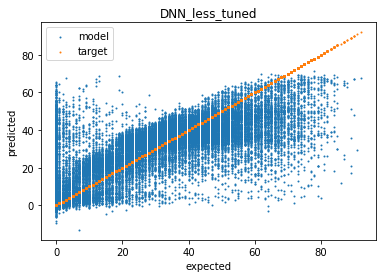

In [223]:
model.evaluate(x_valid_scaled, y_valid)
visualize_model_preformance(model, x_valid_scaled, y_valid, s=1, name="DNN_less_tuned")

In [276]:
dnn_model = keras.models.load_model('models/run_2021_02_09-21_00_30.h5')
run_logdir = get_run_logdir()
run_model_save_file = get_model_save_name()
callbacks = [EarlyStopping(patience=150,restore_best_weights=True),
            TensorBoard(run_logdir),
            ModelCheckpoint(run_model_save_file, save_best_only=True)]
dnn_model.fit(x_train_v_scaled, 
                      y_train_v, 
                      epochs=5000, 
                      validation_data=(x_valid_scaled, y_valid),
                      callbacks=callbacks)

Epoch 1/5000
3028/3028 [==============================] - 3s 978us/step - loss: 154.8842 - val_loss: 168.5151
Epoch 2/5000
3028/3028 [==============================] - 2s 786us/step - loss: 154.9358 - val_loss: 168.8252
Epoch 3/5000
3028/3028 [==============================] - 2s 751us/step - loss: 154.8986 - val_loss: 169.1885
Epoch 4/5000
3028/3028 [==============================] - 2s 765us/step - loss: 154.8133 - val_loss: 168.0487
Epoch 5/5000
3028/3028 [==============================] - 2s 762us/step - loss: 154.9737 - val_loss: 168.1785
Epoch 6/5000
3028/3028 [==============================] - 3s 885us/step - loss: 154.9471 - val_loss: 168.0760
Epoch 7/5000
3028/3028 [==============================] - 2s 798us/step - loss: 154.8400 - val_loss: 168.1832
Epoch 8/5000
3028/3028 [==============================] - 3s 917us/step - loss: 154.8799 - val_loss: 169.3351
Epoch 9/5000
3028/3028 [==============================] - 3s 854us/step - loss: 154.8530 - val_loss: 169.1148
Epoch 10/5

3028/3028 [==============================] - 3s 841us/step - loss: 153.6064 - val_loss: 169.9685
Epoch 76/5000
3028/3028 [==============================] - 2s 803us/step - loss: 153.6140 - val_loss: 168.1860
Epoch 77/5000
3028/3028 [==============================] - 2s 797us/step - loss: 153.3779 - val_loss: 173.4061
Epoch 78/5000
3028/3028 [==============================] - 2s 795us/step - loss: 153.3432 - val_loss: 169.9443
Epoch 79/5000
3028/3028 [==============================] - 2s 796us/step - loss: 153.4859 - val_loss: 170.1787
Epoch 80/5000
3028/3028 [==============================] - 2s 795us/step - loss: 153.1306 - val_loss: 170.3365
Epoch 81/5000
3028/3028 [==============================] - 2s 811us/step - loss: 153.2570 - val_loss: 170.7358
Epoch 82/5000
3028/3028 [==============================] - 2s 785us/step - loss: 153.2655 - val_loss: 169.4516
Epoch 83/5000
3028/3028 [==============================] - 2s 794us/step - loss: 153.4156 - val_loss: 168.7426
Epoch 84/5000
3

In [277]:
dnn_model.evaluate(x_valid_scaled, y_valid)

1010/1010 [==============================] - 1s 490us/step - loss: 167.6143


167.6142578125

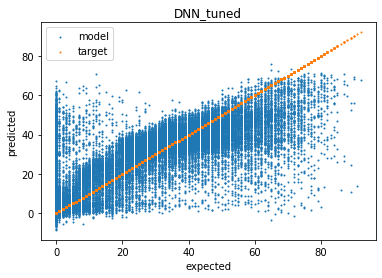

In [278]:
visualize_model_preformance(dnn_model, x_valid_scaled, y_valid, s=1, name="DNN_tuned")

## Random Forest
ideas
- look at parameter importance
- grid search max_leaf_nodes and n_estimators


In [260]:
model = Pipeline([('attribs_adder', ColumnDroper(['artists', 'id', 'name', 'release_date'])), # drops text inputs
                       ('std_scaler', StandardScaler()), # scales data so it is consistant across parameters
                        ('reg', RandomForestRegressor())
                       ])

# Number of trees in random forest
n_estimators =  list(range(1000,2001, 100))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = list(range(10, 111, 10))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = list(range(2,10))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(2,5))
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid  = {'reg__n_estimators': n_estimators,
               'reg__max_features': max_features,
               'reg__max_depth': max_depth,
               'reg__min_samples_split': min_samples_split,
               'reg__min_samples_leaf': min_samples_leaf,
               'reg__bootstrap': bootstrap}
grid_search = RandomizedSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_iter = 50, cv=3, return_train_score=True, verbose=2, n_jobs=4)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 139.2min
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed: 686.9min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('attribs_adder',
                                              ColumnDroper(columns_to_drop=['artists',
                                                                            'id',
                                                                            'name',
                                                                            'release_date'])),
                                             ('std_scaler', StandardScaler()),
                                             ('reg', RandomForestRegressor())]),
                   n_iter=50, n_jobs=4,
                   param_distributions={'reg__bootstrap': [True, False],
                                        'reg__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, None],
                                        'reg__max_features': 

In [261]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    if np.sqrt(-mean_score) < 12.6:
        print(np.sqrt(-mean_score), params)
print(np.sqrt(min(-cvres["mean_test_score"])))

12.573040785166949 {'reg__n_estimators': 1000, 'reg__min_samples_split': 2, 'reg__min_samples_leaf': 4, 'reg__max_features': 'sqrt', 'reg__max_depth': None, 'reg__bootstrap': False}
12.534620438361213 {'reg__n_estimators': 1600, 'reg__min_samples_split': 8, 'reg__min_samples_leaf': 2, 'reg__max_features': 'auto', 'reg__max_depth': 30, 'reg__bootstrap': True}
12.5489233549215 {'reg__n_estimators': 1300, 'reg__min_samples_split': 9, 'reg__min_samples_leaf': 2, 'reg__max_features': 'sqrt', 'reg__max_depth': 40, 'reg__bootstrap': False}
12.519919712047214 {'reg__n_estimators': 1800, 'reg__min_samples_split': 5, 'reg__min_samples_leaf': 2, 'reg__max_features': 'auto', 'reg__max_depth': 70, 'reg__bootstrap': True}
12.573395583803112 {'reg__n_estimators': 1300, 'reg__min_samples_split': 8, 'reg__min_samples_leaf': 4, 'reg__max_features': 'sqrt', 'reg__max_depth': 70, 'reg__bootstrap': False}
12.533363266862146 {'reg__n_estimators': 1000, 'reg__min_samples_split': 5, 'reg__min_samples_leaf': 4

In [262]:
grid_search.best_params_

{'reg__n_estimators': 1100,
 'reg__min_samples_split': 3,
 'reg__min_samples_leaf': 2,
 'reg__max_features': 'auto',
 'reg__max_depth': 20,
 'reg__bootstrap': True}

best results so far
- default: 12.594972524391357
- 12.531446398819769 {'reg__n_estimators': 1300,
 'reg__min_samples_split': 5,
 'reg__min_samples_leaf': 4,
 'reg__max_features': 'auto',
 'reg__max_depth': 60,
 'reg__bootstrap': True}
- 12.515744234868128 {'reg__n_estimators': 1100,
 'reg__min_samples_split': 3,
 'reg__min_samples_leaf': 2,
 'reg__max_features': 'auto',
 'reg__max_depth': 20,
 'reg__bootstrap': True}

Scores: [12.59594617 12.49479531 12.5113109 ]
Mean: 12.534017457713995
Standard Deviation: 0.04430624607222727


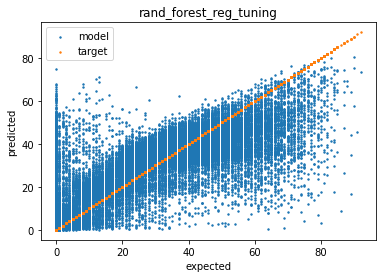

In [259]:
model = Pipeline([('attribs_adder', ColumnDroper(['artists', 'id', 'name', 'release_date'])), # drops text inputs
                       ('std_scaler', StandardScaler()), # scales data so it is consistant across parameters
                        ('reg', RandomForestRegressor(n_estimators=1300, min_samples_split=5, min_samples_leaf=4,max_features='auto', max_depth=60, bootstrap=True))
                       ])
train_and_vis_model(model, x_train, y_train, x_train_v, y_train_v, x_valid, y_valid, name='rand_forest_reg_tuning')

Scores: [12.5751417  12.4760525  12.49940694]
Mean: 12.516867045706846
Standard Deviation: 0.042295062961615386


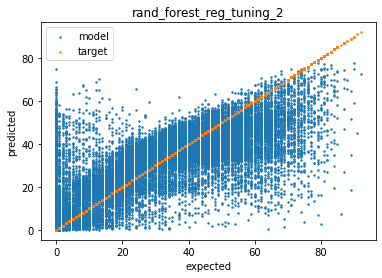

In [264]:
model = Pipeline([('attribs_adder', ColumnDroper(['artists', 'id', 'name', 'release_date'])), # drops text inputs
                       ('std_scaler', StandardScaler()), # scales data so it is consistant across parameters
                        ('reg', RandomForestRegressor(n_estimators=1100,
                                                      min_samples_split=3,
                                                      min_samples_leaf=2,
                                                      max_features='auto',
                                                      max_depth=20,
                                                      bootstrap= True,
                                                      n_jobs=-1))])
train_and_vis_model(model, x_train, y_train, x_train_v, y_train_v, x_valid, y_valid, name='rand_forest_reg_tuning_2')

In [266]:
rf_model = deepcopy(model)

# Generalization
## Random Forest

12.300822075749615


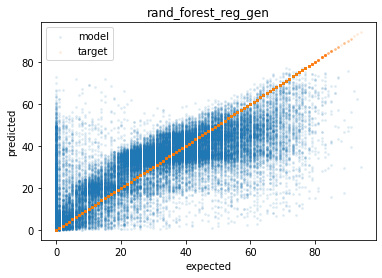

In [289]:
y_test_pred_rf = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test_pred_rf, y_test)
print(np.sqrt(rf_mse))
visualize_model_preformance(rf_model, x_test, y_test, s=3, name="rand_forest_reg_gen")

## DNN

12.783879061686402


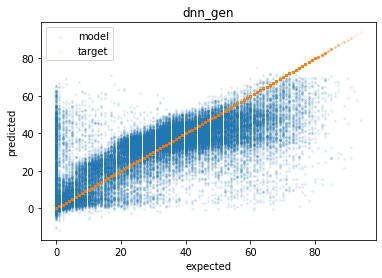

In [290]:
x_test_scaled = data_pipeline.transform(x_test)
y_test_pred_dnn = dnn_model.predict(x_test_scaled)
dnn_mse = mean_squared_error(y_test_pred_dnn, y_test)
print(np.sqrt(dnn_mse))
visualize_model_preformance(dnn_model, x_test_scaled, y_test, s=3, name="dnn_gen")